## <center>PREDICTING THE PRICE OF ETHERIUM


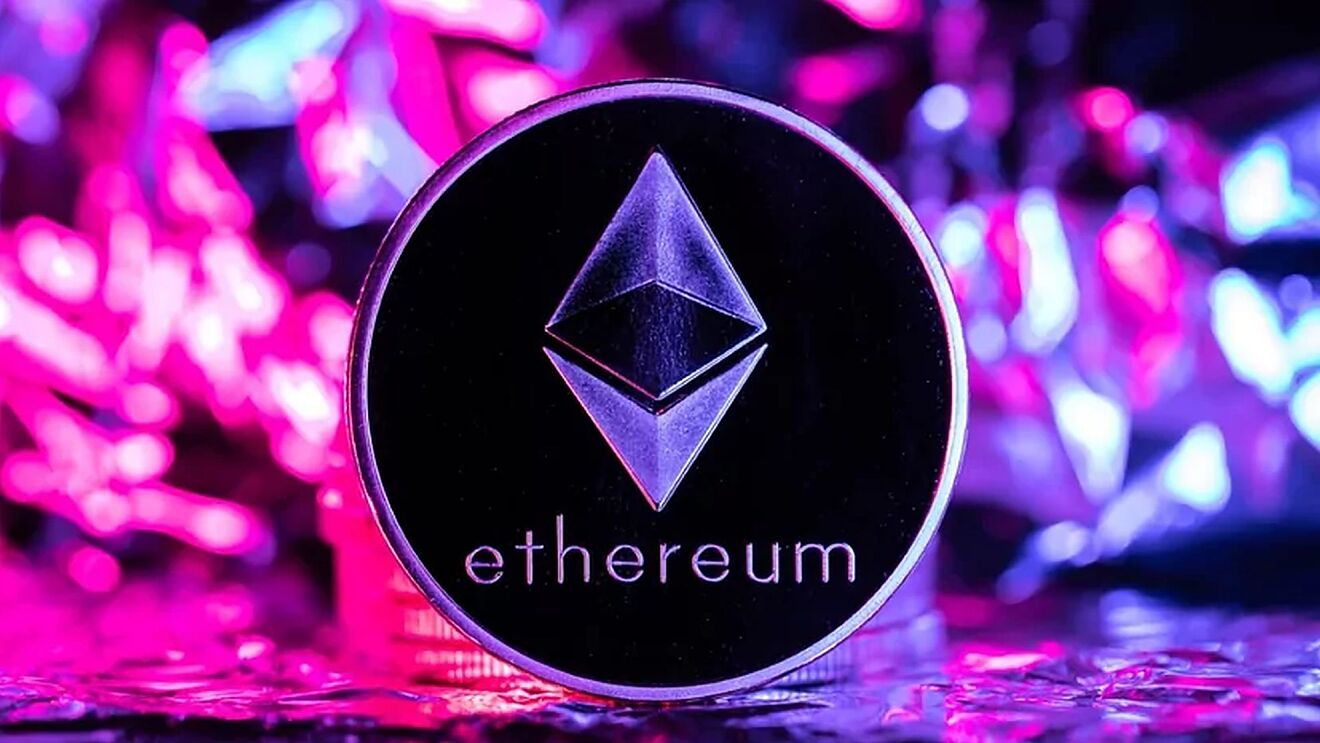

## IMPORTING DEPENDIES

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore') 
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LinearRegression,Ridge,Lasso 
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
import matplotlib.pyplot as plt 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor,BaggingRegressor,ExtraTreesRegressor,HistGradientBoostingRegressor 
from sklearn.svm import LinearSVR

In [2]:
df=pd.read_csv('./ethereum_price.csv')
df.head(5)

,Date,Price,Open,High,Low,Vol.,Change %
0,"Mar 08, 2023","1,553.49","1,561.79","1,569.70","1,548.98",498.57K,-0.53%
1,"Mar 07, 2023","1,561.78","1,565.84","1,580.95","1,536.31",460.10K,-0.26%
2,"Mar 06, 2023","1,565.84","1,564.36","1,581.13","1,555.43",322.16K,0.09%
3,"Mar 05, 2023","1,564.37","1,566.73","1,587.95","1,556.84",313.01K,-0.15%
4,"Mar 04, 2023","1,566.73","1,569.45","1,577.02","1,550.10",247.02K,-0.14%


In [3]:
df.shape

(2555, 7)

In [4]:
df.columns

Index(['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'], dtype='object')

In [5]:
df.describe()

,Date,Price,Open,High,Low,Vol.,Change %
count,2555,2555,2555,2555,2555,2555,2555
unique,2555,2442,2434,2436,2428,2016,1333
top,"Mar 08, 2023",10.16,10.16,10.16,10.16,1.42M,0.00%
freq,1,9,8,7,7,10,14


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2555 entries, 0 to 2554
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      2555 non-null   object
 1   Price     2555 non-null   object
 2   Open      2555 non-null   object
 3   High      2555 non-null   object
 4   Low       2555 non-null   object
 5   Vol.      2555 non-null   object
 6   Change %  2555 non-null   object
dtypes: object(7)
memory usage: 139.9+ KB


In [7]:
df.isnull().mean()*100

Date        0.0
Price       0.0
Open        0.0
High        0.0
Low         0.0
Vol.        0.0
Change %    0.0
dtype: float64

## Label Encoding

In [8]:
le=LabelEncoder()

In [9]:
df["Date"]=le.fit_transform(df["Date"])
df["Price"]=le.fit_transform(df["Price"])
df["Open"]=le.fit_transform(df["Open"])
df["High"]=le.fit_transform(df["High"])
df["Low"]=le.fit_transform(df["Low"])
df["Vol."]=le.fit_transform(df["Vol."])
df["Change %"]=le.fit_transform(df["Change %"])

## Univariate Analysis

## Hist Plot

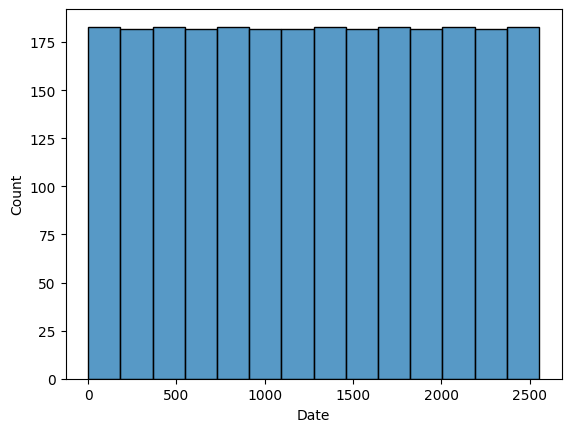

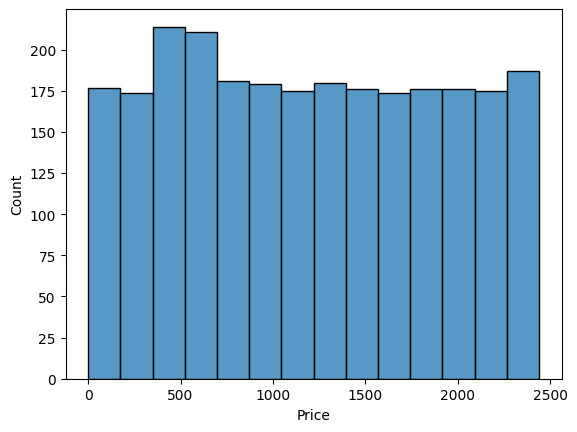

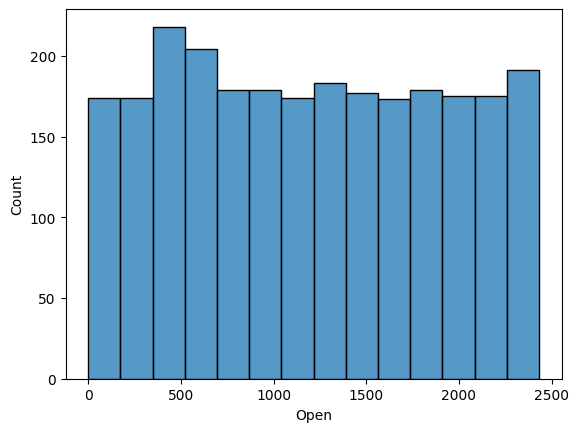

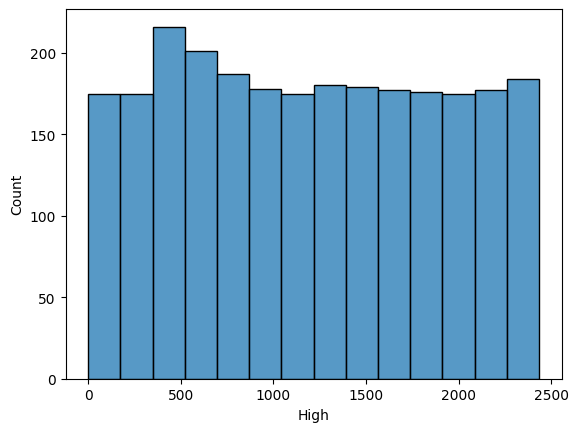

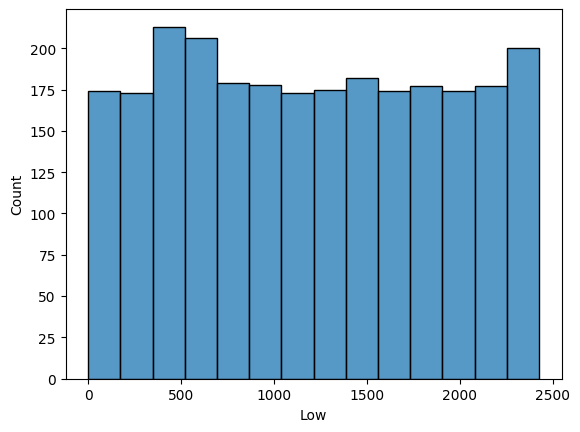

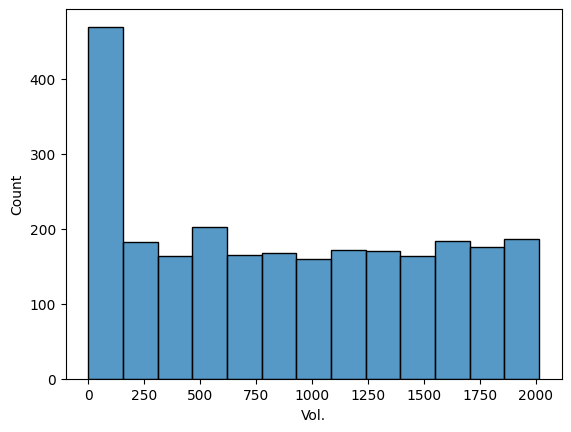

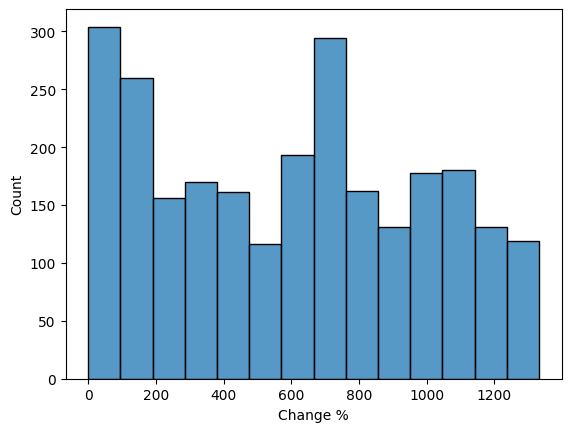

In [10]:
for i in df.columns:
    if df[i].dtype!="object":
        sns.histplot(x=df[i])
        plt.show()

## KDE Plot

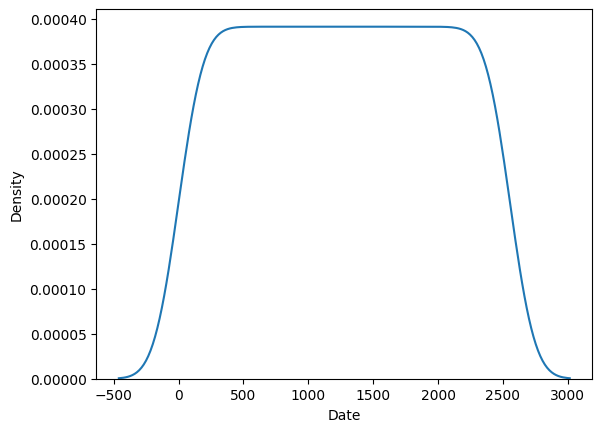

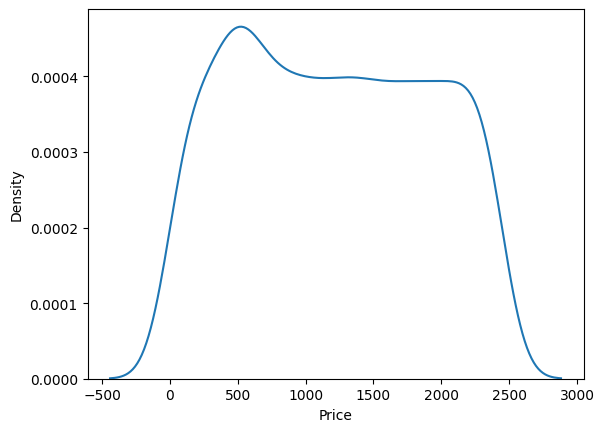

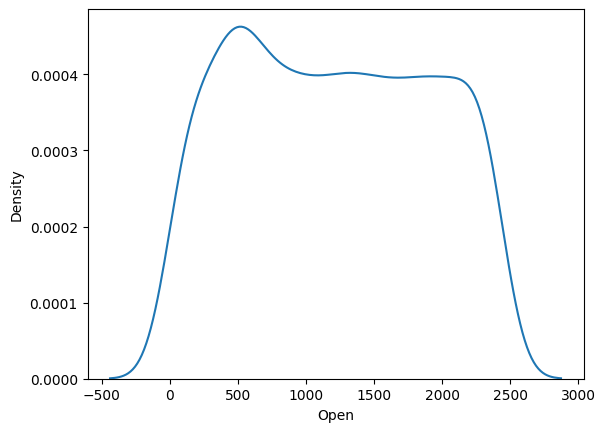

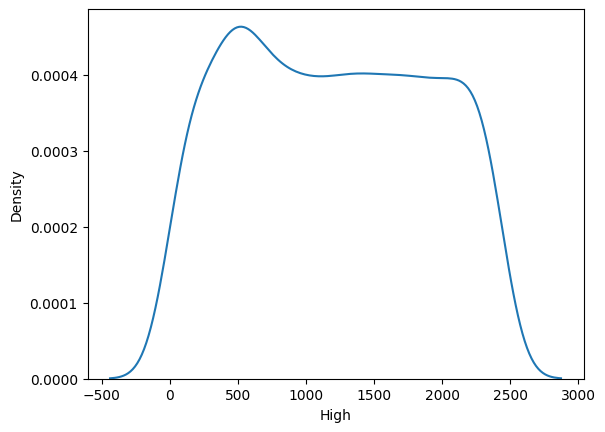

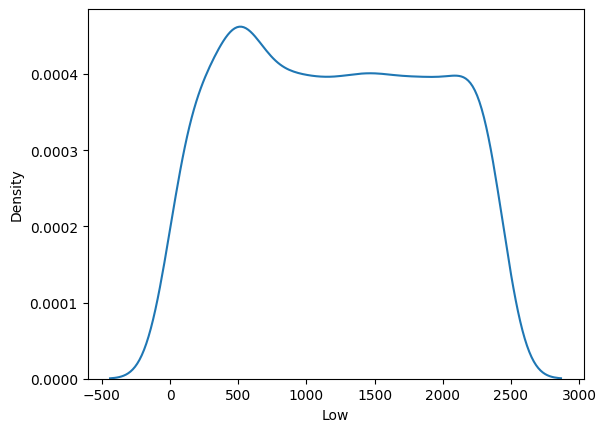

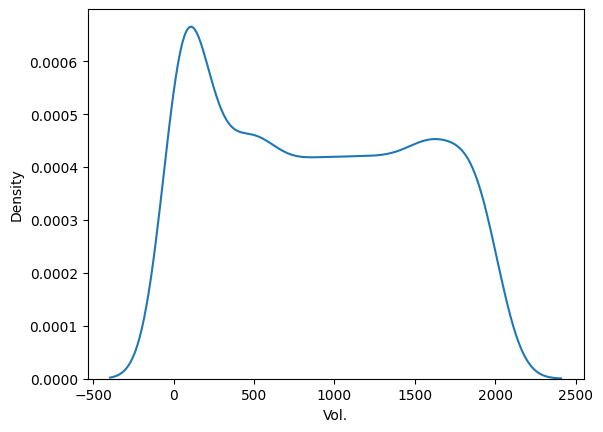

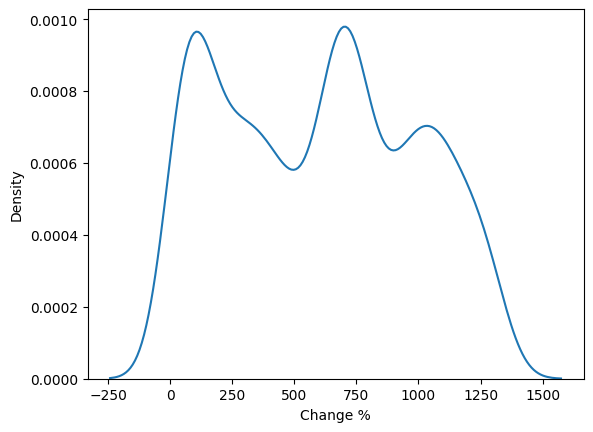

In [11]:
for i in df.columns:
    if df[i].dtype!="object":
        sns.kdeplot(x=df[i])
        plt.show()

## Box Plot

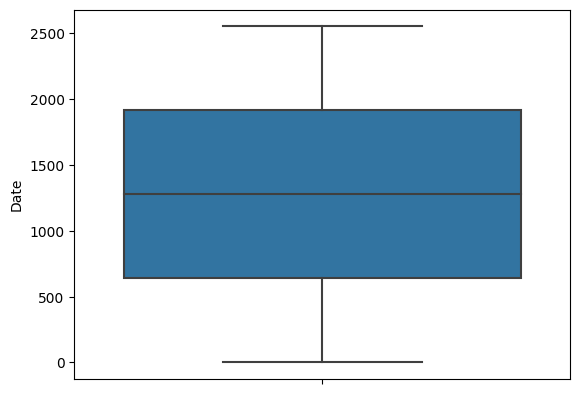

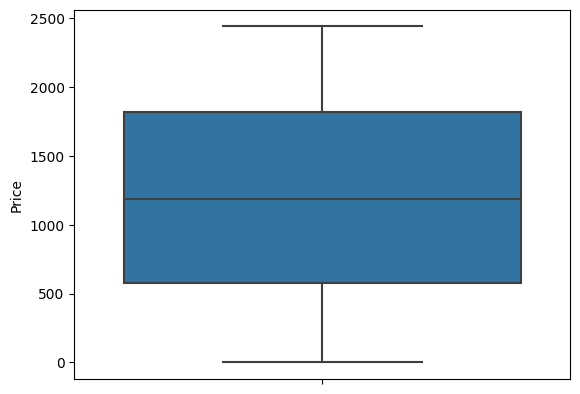

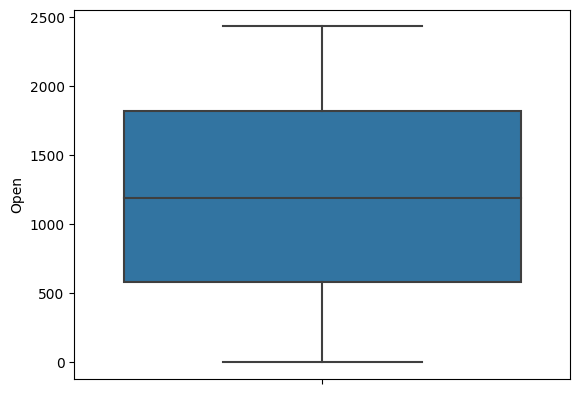

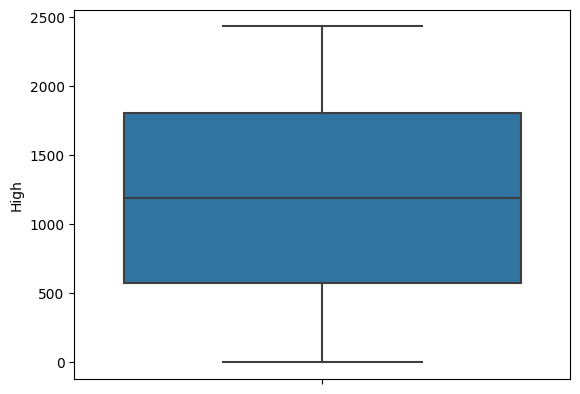

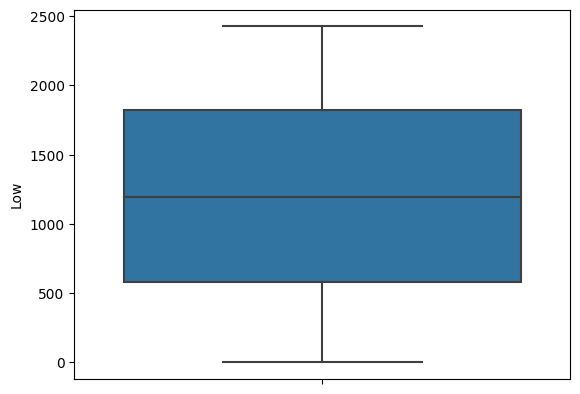

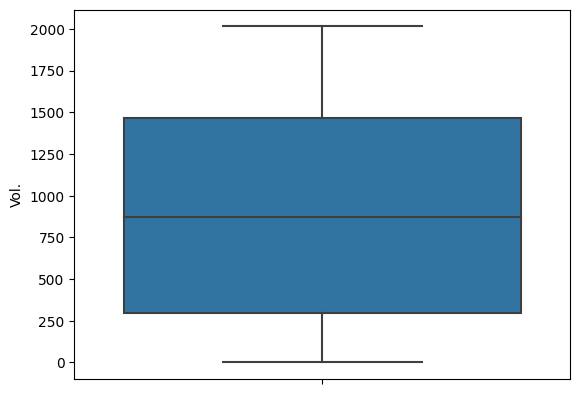

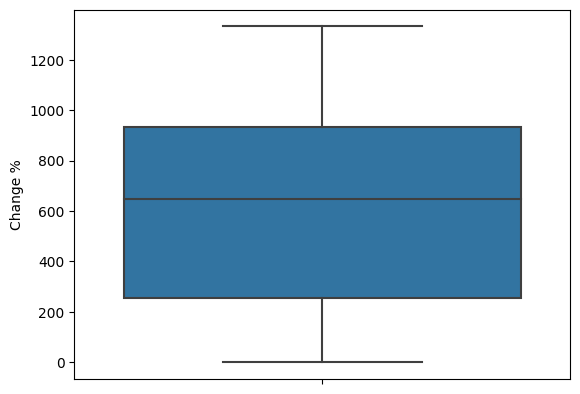

In [12]:
for i in df.columns:
    if df[i].dtype!="object":
        sns.boxplot(y=df[i])
        plt.show()

### There's No Outliers 

## Multi Variate Analysis

## Line Plot

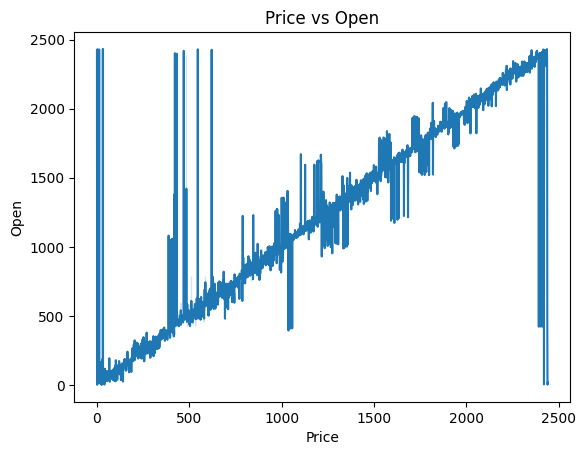

In [13]:
sns.lineplot('Price','Open', data=df)
plt.title("Price vs Open")
plt.show()

## Pair Plot

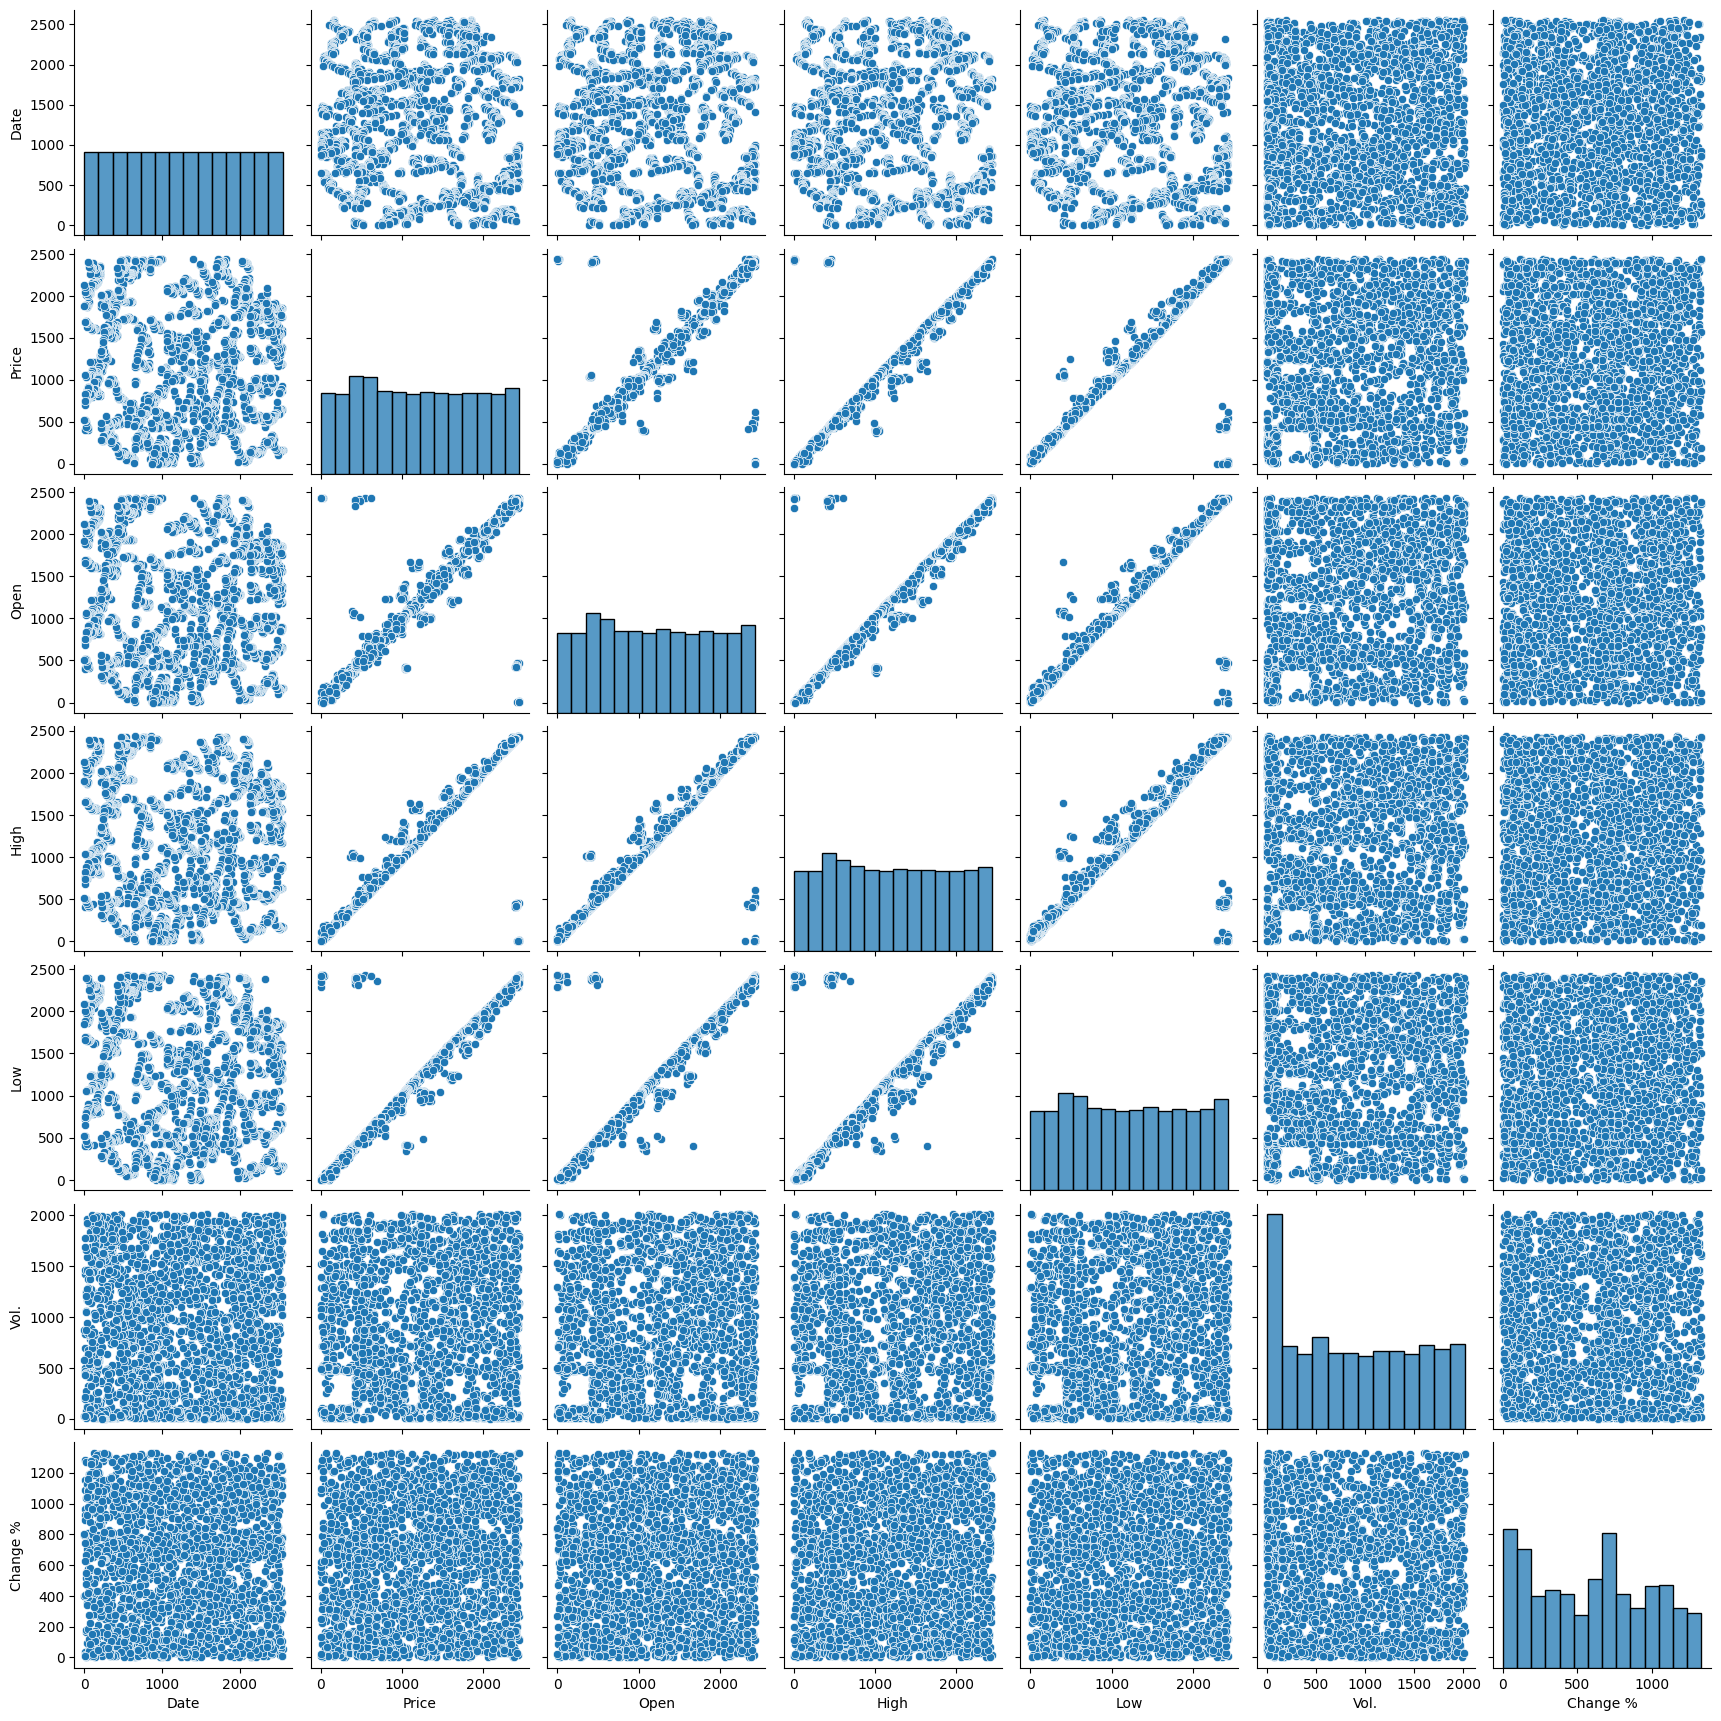

In [14]:
sns.pairplot(data=df)
plt.show()

## Heat Map

<AxesSubplot: >

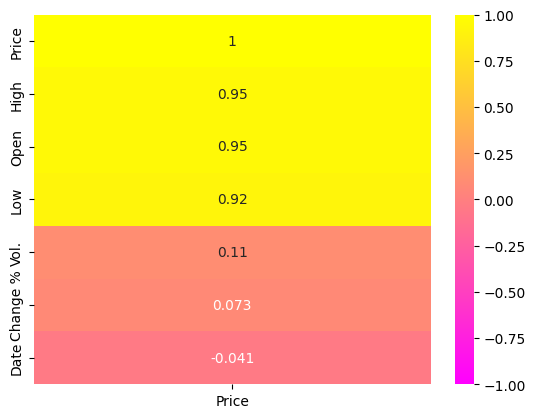

In [15]:
sns.heatmap(df.corr()[["Price"]].sort_values(by="Price",ascending=False), vmin=-1, vmax=1, annot=True, cmap='spring')

## Setting Target

In [16]:
x=df[['Low','Open','High']].values

In [17]:
y=df[['Price']].values

## Feature Scaling

In [18]:
sc=StandardScaler()

In [19]:
x=sc.fit_transform(x)

## Splitting Data into Train & Test Data

In [20]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2, random_state=0)

## Model Choosing

In [21]:
models={
    "linearRegression": LinearRegression(),
    "Ridge":Ridge(),
    "LinearSVR":LinearSVR(),
    "Lasso":Lasso(),
    "GradientBoostingRegressor":GradientBoostingRegressor(),
    "BaggingRegressor":BaggingRegressor(),
    "HistgradientBoostingRegressor":HistGradientBoostingRegressor(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "RandomForestRegressor":RandomForestRegressor(random_state=0)
}

In [22]:
for name,model in models.items():
    model.fit(x_train, y_train)
    print("model trained with {}".format(name))
    training_score=model.score(x_train, y_train)*100
    testing_score=model.score(x_test, y_test)*100
    score= r2_score(y_test, model.predict(x_test))*100
    mae=mean_absolute_error(y_test, model.predict(x_test))
    mse=mean_squared_error(y_test, model.predict(x_test))
    rmse=np.sqrt(mse)
    print("r2score:",score)
    print("training_score:",training_score)
    print("testing_score:",testing_score)
    print("mae:",mae)
    print("mse:",mse)
    print("rmse_test:",rmse)
    print("*"*200)

model trained with linearRegression
r2score: 93.64938370392859
training_score: 94.13173550411584
testing_score: 93.64938370392859
mae: 56.67255973160122
mse: 32182.10643350709
rmse_test: 179.39371904698083
********************************************************************************************************************************************************************************************************
model trained with Ridge
r2score: 93.65357192879976
training_score: 94.13167995733622
testing_score: 93.65357192879976
mae: 56.67105871078412
mse: 32160.882367638875
rmse_test: 179.33455430462607
********************************************************************************************************************************************************************************************************
model trained with LinearSVR
r2score: 93.71461420695185
training_score: 93.7200286027618
testing_score: 93.71461420695185
mae: 64.63266272172756
mse: 31851.547178603825
rmse_test: 178.470017590081

## Model Building

In [23]:
model=Ridge()

In [24]:
model.fit(x_train, y_train)

Ridge()

In [25]:
training_score=model.score(x_train, y_train)*100
testing_score=model.score(x_test, y_test)*100
score= r2_score(y_test, model.predict(x_test))*100
mae=mean_absolute_error(y_test, model.predict(x_test))
mse=mean_squared_error(y_test, model.predict(x_test))
rmse=np.sqrt(mse)

In [26]:
y_pred = model.predict(x)

In [27]:
OUTPUT= pd.DataFrame(zip(y,y_pred), columns= ("ACTUAL", "PREDICTED"), dtype= float)
OUTPUT.head()

,ACTUAL,PREDICTED
0,226.0,225.721936
1,233.0,226.878819
2,236.0,232.211379
3,234.0,234.607739
4,239.0,230.648329


## Visualizing The Dataset

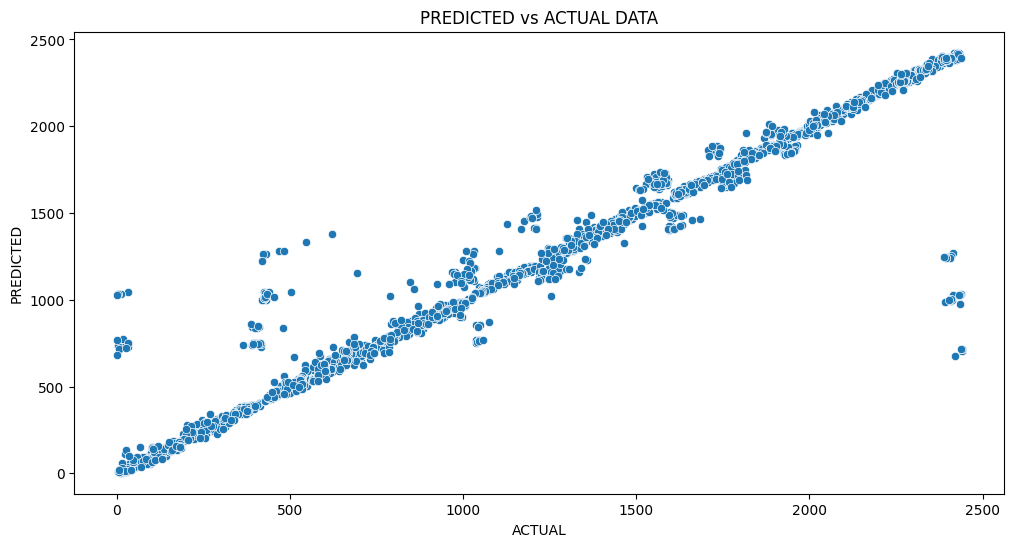

In [28]:
plt.figure(figsize=(12,6))
plt.title("PREDICTED vs ACTUAL DATA")
plt.xticks()
sns.scatterplot(data=OUTPUT, x="ACTUAL", y="PREDICTED");